<a href="https://colab.research.google.com/github/Norwrongcl/ADA-Informes/blob/main/OptimeBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Optimal Binary Search Tree
**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).

Los árboles binarios de búsqueda, también llamados **BST** (Binary Search Tree) son un tipo de árbol, el cual presenta una estructura de datos. Éstos siempre tienen una raíz e hijos izquierdos y derechos, en donde se cumple que el hijo izquierdo de cualquier nodo no vacío contiene valores menores a dicho nodo, y el hijo derecho contiene sus valores mayores. Existen algoritmos implementados utilizando el paradigma **programación dinámica**, existe aquel caso en donde queremos buscar un elemento, sin embargo, ya conocemos la frecuencia con la que será visitado cada uno. Por lo tanto, lo mejor sería construir un árbol que tenga los elementos más repetidos en la parte superior, y aquellos que NO, mucho más abajo. A esto lo llamamos **árbol binario de búsqueda óptimo**.

![image](https://cis.temple.edu/~wolfgang/cis551/Korsh_ch12_4-12_5/537_A.GIF)

#2. Árbol de búsqueda óptimo

##2 Código
A continuación, se presentan dos implementaciones del algoritmo OptimalBST: por recursión y por acercamiento bottom-up (programación dinámica).

In [104]:
import random
import numpy as np
from termcolor import cprint
from math import inf

subproblems= 0
calls= 0

def roptimalBST(k,p, q, i , f):
  global calls
  calls+=1
  
  if(i > f): return q[i-1]
  sumprobK = sum(p[i - 1: f])
  sumprobD = sum(q[i - 1: f + 1])
  prob = sumprobD + sumprobK


  cost = inf
  for r in range(i, f + 1):
    costIzq = roptimalBST(k,p,q,i, r - 1)
    costDer = roptimalBST(k,p,q,r + 1, f)
    cost2 = costIzq + costDer + prob
    if(cost2 < cost ):
      cost = cost2

  return cost

def dpoptimalBST(k, p, q, largo, verbose):
  global subproblems

  costoEsperado = np.zeros((largo + 2, largo + 1))
  prob = np.zeros((largo + 2, largo + 1))
  root = np.zeros((largo + 1, largo + 1))
  for i in range(1, largo + 2):
    costoEsperado[i][i-1] = q[i-1]
    prob[i][i-1] = q[i-1]

  for i in range (1, largo + 1):
    for j in range (1, largo - i + 2):
        subproblems+=1
        k = i + j - 1
        costoEsperado[j][k] = inf
        prob[j][k] = prob[j][k-1] + p[k - 1] + q[k]
        if(verbose == True):
          cprint(f"Costo esperado en la posición i: {j} j: {k} \n",'red', attrs=['bold','underline'])
        for  r in range(j,k + 1):
          izq = r - 1
          der = r + 1
          cost  = costoEsperado[j][izq] + costoEsperado[der][k] + prob[j][k]
          if(verbose == True):
            cprint(f"Raiz a evaluar: {r}",'yellow', attrs=['bold'])
            cprint(f"Costo de la raíz: {cost} \n",'cyan', attrs=['bold'])
          if cost  < costoEsperado[j][k] :
            costoEsperado[j][k] = cost
            root[j][k] = r
        if(verbose == True):
          cprint(f"Raíz optima: {root[j][k]}",'blue', attrs=['bold'])  
          cprint(f"Costo mínimo {costoEsperado[j][k]} \n\n",'red', attrs=['bold','underline'])

          
    

  return costoEsperado

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p= list(arr[:n])
    q= arr[n:]
    return keys, p, q

# MAIN
def main(op, verbose=False):
  n = random.randint(1,5)
  keys, p, q = optimal_bst_instance_generator(n)
  cprint(f"Elementos del árbol: {keys}", 'yellow', attrs=["bold"])
  if (op == 1):
    cprint("Implementación: Programación dinámica",'blue', attrs=['bold','underline'])
    test = dpoptimalBST(keys, p, q, len(keys), verbose)
    minm=str(test[1])
    aux= minm.split(" ")
    final= len(aux)
    siuu= aux[final-1]
    pr= siuu.replace(']','')
    cprint(f"Costo Esperado: {pr}",'magenta', attrs=['bold'])
    cprint(f"Subproblemas resueltos: {subproblems}",'red', attrs=['bold','underline'])
  if (op == 2):
    cprint("Implementación: Recursiva",'blue', attrs=['bold','underline'])
    test = roptimalBST(keys,p, q, 1 , len(keys))
    cprint(f"Costo Esperado: {test}",'green', attrs=['bold'])

def optimal_bst_instance_generator(n):
    keys= sorted(random.sample(range(1, 100), n))
    arr= np.random.random(n*2+1)
    arr/= arr.sum()
    p= list(arr[:n]) 
    q= arr[n:]
    return keys, p, q

op= random.randint(1,2)
main(op, verbose=False)

Elementos del árbol: [20, 67, 70, 88]
Implementación: Programación dinámica
Costo Esperado: 2.57265632
Subproblemas resueltos: 10


# 2.2 Descripcion del algoritmo

Arbol binario de búsqueda óptimo funcionara de la siguiente manera:

1. Primero se crea un matriz auxiliar que guardará los valores.

2. Se realiza una comparacion segun los nodos, si tenemos un nodo donde el coste es igual a la frecuencia del nodo y el segundo caso para cuando tenemos mas de un nodo donde su frecuencia es igual al coste, calculandose su respectivo coste.

3. Se guardan los valores iterativamente.

>Arbol binario de búsqueda óptimo con programacion recursiva: El árbol puede ser modificado únicamente una sola vez que este ha sido construido. Este tipo de programacion es bastante ineficiente a comparacion de la programacion dinamica debido a que trantando de cumplir la misma funcion en este caso el costo optimo debe de resolver todos los subproblemas anteriores al actual debido a que estos no fueron almacenados en ninguna variable auxiliar.

>Arbol binario de búsqueda óptimo con programacion dinámica: A diferencia del recurisvo, este es modificable en cualquier momento de su ejecucion permitiendo rotaciones de nodos (algo así como un árbol auto balanceable). Tiene una ventaja en su complejidad a comparacion del árbol binario de búsqueda óptimo recursivo debido a que por medio del guardado de las operaciones anteriormente hechas, no es necesario el resolverlas otra vez, logrando asi una mejor optimización respecto al algoritmo recursivo.

# 2.3 Ejemplo

***Entrada:***

$k= [1, 2, 3, 4, 5]$

$p= [0.15, 0.10, 0.05, 0.10, 0.20]$

$q= [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]$

***Tamaño:*** $5$

-------------
>Costo esperado en la posición i: 1 j: 1 

Raiz a evaluar: 1
Costo de la raíz: 0.4 

Raíz optima:  1.0
Costo mínimo 0.4 


>Costo esperado en la posición i: 2 j: 2 

Raiz a evaluar: 2
Costo de la raíz: 0.4 

Raíz optima:  2.0
Costo mínimo 0.4 


>Costo esperado en la posición i: 3 j: 3 

Raiz a evaluar: 3
Costo de la raíz: 0.30000000000000004 

Raíz optima:  3.0
Costo mínimo 0.30000000000000004 


>Costo esperado en la posición i: 4 j: 4 

Raiz a evaluar: 4
Costo de la raíz: 0.35 

Raíz optima:  4.0
Costo mínimo 0.35 


>Costo esperado en la posición i: 5 j: 5 

Raiz a evaluar: 5
Costo de la raíz: 0.4 

Raíz optima:  5.0
Costo mínimo 0.4 


>Costo esperado en la posición i: 1 j: 2 

Raiz a evaluar: 1
Costo de la raíz: 0.85 

Raiz a evaluar: 2
Costo de la raíz: 0.85 

Raíz optima:  1.0
Costo mínimo 0.85 


>Costo esperado en la posición i: 2 j: 3 

Raiz a evaluar: 2
Costo de la raíz: 0.8 

Raiz a evaluar: 3
Costo de la raíz: 0.85 

Raíz optima:  2.0
Costo mínimo 0.8 


>Costo esperado en la posición i: 3 j: 4 

Raiz a evaluar: 3
Costo de la raíz: 0.7999999999999999 

Raiz a evaluar: 4
Costo de la raíz: 0.75 

Raíz optima:  4.0
Costo mínimo 0.75 


>Costo esperado en la posición i: 4 j: 5 

Raiz a evaluar: 4
Costo de la raíz: 0.95 

Raiz a evaluar: 5
Costo de la raíz: 0.8999999999999999 

Raíz optima:  5.0
Costo mínimo 0.8999999999999999 


>Costo esperado en la posición i: 1 j: 3 

Raiz a evaluar: 1
Costo de la raíz: 1.4000000000000001 

Raiz a evaluar: 2
Costo de la raíz: 1.25 

Raiz a evaluar: 3
Costo de la raíz: 1.4500000000000002 

Raíz optima:  2.0
Costo mínimo 1.25 


>Costo esperado en la posición i: 2 j: 4 

Raiz a evaluar: 2
Costo de la raíz: 1.45 

Raiz a evaluar: 3
Costo de la raíz: 1.35 

Raiz a evaluar: 4
Costo de la raíz: 1.4500000000000002 

Raíz optima:  3.0
Costo mínimo 1.35 


>Costo esperado en la posición i: 3 j: 5 

Raiz a evaluar: 3
Costo de la raíz: 1.6 

Raiz a evaluar: 4
Costo de la raíz: 1.35 

Raiz a evaluar: 5
Costo de la raíz: 1.4500000000000002 

Raíz optima:  4.0
Costo mínimo 1.35 


>Costo esperado en la posición i: 1 j: 4 

Raiz a evaluar: 1
Costo de la raíz: 2.1500000000000004 

Raiz a evaluar: 2
Costo de la raíz: 1.9 

Raiz a evaluar: 3
Costo de la raíz: 1.9500000000000002 

Raiz a evaluar: 4
Costo de la raíz: 2.0500000000000003 

Raíz optima:  2.0
Costo mínimo 1.9 


>Costo esperado en la posición i: 2 j: 5 

Raiz a evaluar: 2
Costo de la raíz: 2.3000000000000003 

Raiz a evaluar: 3
Costo de la raíz: 2.15 

Raiz a evaluar: 4
Costo de la raíz: 2.0500000000000003 

Raiz a evaluar: 5
Costo de la raíz: 2.25 

Raíz optima:  4.0
Costo mínimo 2.0500000000000003 


>Costo esperado en la posición i: 1 j: 5 

Raiz a evaluar: 1
Costo de la raíz: 3.1000000000000005 

Raiz a evaluar: 2
Costo de la raíz: 2.75 

Raiz a evaluar: 3
Costo de la raíz: 2.75 

Raiz a evaluar: 4
Costo de la raíz: 2.6500000000000004 

Raiz a evaluar: 5
Costo de la raíz: 2.95 

Raíz optima:  4.0
Costo mínimo 2.6500000000000004 

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [101]:
main(1,verbose=True)

Elementos del árbol: [20, 34, 39, 70]
Implementación: Programación dinámica
Costo esperado en la posición i: 1 j: 1 

Raiz a evaluar: 1
Costo de la raíz: 0.5767234539005021 

Raíz optima: 1.0
Costo mínimo 0.5767234539005021 


Costo esperado en la posición i: 2 j: 2 

Raiz a evaluar: 2
Costo de la raíz: 0.4686791232380938 

Raíz optima: 2.0
Costo mínimo 0.4686791232380938 


Costo esperado en la posición i: 3 j: 3 

Raiz a evaluar: 3
Costo de la raíz: 0.3345896447222922 

Raíz optima: 3.0
Costo mínimo 0.3345896447222922 


Costo esperado en la posición i: 4 j: 4 

Raiz a evaluar: 4
Costo de la raíz: 0.45262977414388406 

Raíz optima: 4.0
Costo mínimo 0.45262977414388406 


Costo esperado en la posición i: 1 j: 2 

Raiz a evaluar: 1
Costo de la raíz: 1.1018323885972654 

Raiz a evaluar: 2
Costo de la raíz: 1.2267296067489089 

Raíz optima: 1.0
Costo mínimo 1.1018323885972654 


Costo esperado en la posición i: 2 j: 3 

Raiz a evaluar: 2
Costo de la raíz: 0.8523850593160456 

Raiz a eval

# 3. Correctitud

Para el algoritmo bottom-up, debemos calcular el costo mínimo, para eso se nombra los nodos de $k_1,k_2...k_n$ para crear el árbol binario y agregarle las claves ficticias, esta búsqueda de árbol binario con $n$ nodos tendríamos que examinar un número exponencial de árboles, por lo que es mucho mas eficiente resolver este problema con programación dinámica.


### Sub estructura óptima

Para la sub estructura optima consideramos que cualquier subárbol $k_i...k_j $ debe cumplir que $1 <= i <= j <= n$, donde los sub arboles deben contener claves ficticias $di-1,....dj$

Se sabe que el árbol binario de búsqueda óptimo **BST** tiene subárboles que contienen las claves $k_i...k_j $ con sus respectivas claves ficticias $d_i-1,....d_j$, se puede decir que $k_r$ donde $(i <=  r <= j)$ es sub raíz de una sub árbol óptimo que contiene todas las claves 

El subárbol izquierdo contiene todas la claves $k_r$  $k_i...k_r-1 $ y $di-1,....dr-1$ y el subárbol derecho contiene $k_r+1...k_j $.

Comparando los candidatos $k_r$ y aseguraríamos que encontramos árbol binario de búsqueda óptimo mientras $i<= r <= j$


### Definir una función recurrente

Para definir nuestra función recurrente debemos saber nuestro dominio de subproblema que contenga las claves **$k_i...k_j $** cuando **$1 <= i <= j <= n$**. Ahora podemos definir e[i,j] que es el costo esperado

Calcular la suma de las probabilidades para cada subárbol:

$t[i,j] = \sum_{l=i}^{j}p_l + \sum_{l=i-1}^{j}q_l$

De esta manera tenemos que en el caso de que $k_r$ es una raíz de un árbol binario de búsqueda óptimo $k_i...k_j$ tenemos que:

$k[i,j]=p_r+(k[i,r-1]+t(i,r-1))+(k[r+1,j]+t(r+1,j))$

Luego:

$t(i,j)=t(i,r-1) + p_r + t(r+1,j)$

Ahora que tenemos $t(i,j)$ podemos describir $k[i,j]$

$k[i,j]= k[i,r-1] + k[r+1,j]+ t(i,j)$


### Correctitud

Al inicio del algoritmo la matriz k[] contendrá los mínimos obtenidos en cada iteración de $l...n$, para lograr calcular el costo mínimo.

>Inicialización:

Al principio se crean y se inicializa la diagonal de la matriz k[] que contiene la suma de los costos mínimos, esto siempre será correcto porque aún no tenemos sub problemas

>Mantención:

Durante la ejecución se sumarán las probabilidades para cada raíz $k_0...K_n$ y se calcula el costo mínimo, esto es correcto porque se irán guardando solo los mínimos calculados en la matriz k[].

>Finalización: 

Finalmente vamos a tener la solución del problema gracias al paradigma de programación dinámica 

# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

El tiempo de ejecución es $n^3$ ya que la solución de cada sub problema al igual que el algoritmo visto antes (**matrix chain**) es $O(n^2)$ y cada vez que queremos encontrar el sub problema seria $O(n)$.

Lo resolvemos y nos quedaría $O(n^3)$.

Para construir la formula necesitamos el costo de resolver cada sub-problema y la cantidadlo que cuesta encontrar el sub problema.

Tiene una complejidad espacial $n^2$ debido a que debe guardar datos en una matriz de tamaño $n*n$, de la cual solo ocupa la mitad queda: $(n^2)/(2)$, asi tenemos que su complejidad espacial es $n^2$.

# 5. Experimentos

### Arból de busqueda Optimo: Recursivo v/s Bottom-Up

Comparacion del tiempo de ejecución de los dos algoritmos para ver cual es más eficiente.


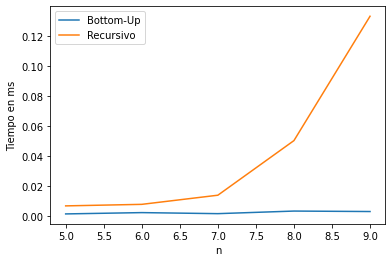

In [107]:
from timeit import repeat
import matplotlib.pyplot as plt

keys, p, q = optimal_bst_instance_generator(10)


x=[]; y1=[]; y2=[];

for n in range(5,10):
  keys, p, q = optimal_bst_instance_generator(n)
  cont = [0]
  cont2 = [0]
  verbose = False
  t1= repeat(setup="from __main__ import dpoptimalBST", stmt=f"dpoptimalBST({keys},{p},{q.tolist()},{len(keys)},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import roptimalBST", stmt=f"roptimalBST({keys},{p},{q.tolist()},{1},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up", "Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Resultado

Como podemos ver, a pesar que Bottom-Up requiere de memoria para ir guardando los datos de los subproblemas, es mucho más eficiente que el método recursivo, debido que este se llama asi mismo muchas veces pero por la memoizacion omite calcular subproblemas repetidos en el caso de Bottom-Up lo que lo hace un proceso mucho más rápido.